In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fct_velocity(x, latency, tau, steady_state) :

    time = x
    velocity = []
    maxi = steady_state
    for t in range(len(time)) :

        if time[t] < latency :
            velocity.append(0)
        else :
            velocity.append(maxi*(1-np.exp(-1/tau*(time[t]-latency))))

    return velocity


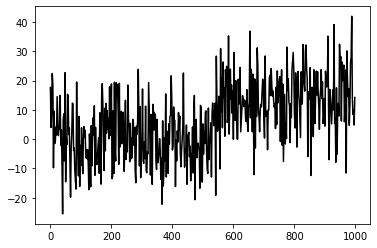

In [11]:
x = np.asarray(range(0, 1000, 2))
latency = 500
tau = 50
steady_state = 15
np.random.seed(0)

velo = fct_velocity(x, latency, tau, steady_state)
velo += 10*np.random.randn(x.size)

plt.plot(x, velo, 'k');

In [4]:
param_fit = [{'name':'steady_state', 'value':12,  'min':5.,  'max':40.},
             {'name':'latency',      'value':500, 'min':100, 'max':700},
             {'name':'tau',          'value':15., 'min':13., 'max':80.}]

inde_vars = {'x': x}

from lmfit import  Model, Parameters

equation = fct_velocity

params = Parameters()
model = Model(equation, independent_vars=inde_vars.keys())

for num_par in range(len(param_fit)) :
    params.add(param_fit[num_par]['name'],
               value = param_fit[num_par]['value'],
               min   = param_fit[num_par]['min'],
               max   = param_fit[num_par]['max'])

result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)


In [5]:
result_deg

In [6]:
result_deg.values['latency']

501.5071921687859

In [13]:
bruit

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

# bruit

In [15]:
N_test = 200
bruit = np.arange(0,10,0.1)


std_lat, covars = [], []
for b in bruit :
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += b*np.random.randn(x.size)
    
    Lats, covars_ = [], []
    for i_test in range(N_test):
        
        for num_par in range(len(param_fit)) :
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+50*np.random.randn()
            else :
                val = param_fit[num_par]['value']
            params.add(param_fit[num_par]['name'],
                       value =  val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        covars_.append(result_deg.covar[1, 1])
        
    covars.append(np.mean(covars_))
    std_lat.append(np.std(Lats))
    print(f'{b} = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms); covar = {np.mean(covars_):.2f} +/- {np.std(covars_):.2f} ')

0.0 = 500.00 +/- 0.00 (ms); covar = 0.00 +/- 0.00 
0.1 = 500.22 +/- 0.00 (ms); covar = 0.02 +/- 0.00 
0.2 = 499.89 +/- 0.00 (ms); covar = 0.06 +/- 0.00 
0.30000000000000004 = 500.02 +/- 0.00 (ms); covar = 0.19 +/- 0.00 
0.4 = 500.25 +/- 0.00 (ms); covar = 0.32 +/- 0.00 
0.5 = 498.99 +/- 0.00 (ms); covar = 0.49 +/- 0.00 
0.6000000000000001 = 498.83 +/- 0.00 (ms); covar = 0.66 +/- 0.00 
0.7000000000000001 = 500.05 +/- 0.00 (ms); covar = 1.12 +/- 0.00 
0.8 = 500.68 +/- 0.00 (ms); covar = 1.01 +/- 0.00 
0.9 = 499.35 +/- 0.00 (ms); covar = 1.41 +/- 0.00 
1.0 = 504.82 +/- 0.00 (ms); covar = 1.54 +/- 0.00 
1.1 = 501.45 +/- 0.00 (ms); covar = 2.29 +/- 0.00 
1.2000000000000002 = 499.20 +/- 0.66 (ms); covar = 2.64 +/- 0.03 
1.3 = 499.86 +/- 0.00 (ms); covar = 3.07 +/- 0.00 
1.4000000000000001 = 498.73 +/- 0.00 (ms); covar = 3.93 +/- 0.00 
1.5 = 503.34 +/- 0.00 (ms); covar = 3.97 +/- 0.00 
1.6 = 501.75 +/- 0.00 (ms); covar = 3.84 +/- 0.00 
1.7000000000000002 = 502.90 +/- 0.00 (ms); covar = 4.94 +

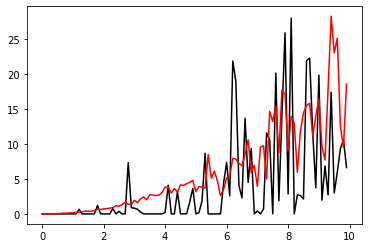

In [16]:
plt.plot(bruit, std_lat, 'k')
plt.plot(bruit, np.array(covars)/10, 'r');